# Objective 1 - Pipeline

In [1]:
import sys
import os
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sys.path.append(os.path.realpath('../'))
sys.path.append(os.path.realpath('../../'))

from preprocess_data import Preprocces
from create_model import PreproccesModel

Using TensorFlow backend.


**Pre-proccesing data**

In [2]:
data = '../../data/dataset_multilng.csv'

preprocces = Preprocces(data)
df,stats_words = preprocces.clean_dataframe()

[2020-08-02][15:27:11][preprocess_data][INFO] Remove column :Unnamed: 0
[2020-08-02][15:27:11][preprocess_data][INFO] Shape of dataframe:(23128, 3)
[2020-08-02][15:27:11][preprocess_data][INFO] Checking is there is null values
[2020-08-02][15:27:11][preprocess_data][INFO] Remove null values: 1
[2020-08-02][15:27:11][preprocess_data][INFO] Remove digits and digits with words example : 460bc --> ""
[2020-08-02][15:27:29][preprocess_data][INFO] Transform words to lowercase example: Electronics --> electronics
[2020-08-02][15:27:29][preprocess_data][INFO] Remove special characters example : $# -->"" 
[2020-08-02][15:27:56][preprocess_data][INFO] Remove words with lenght less than three example : for --> "" 
[2020-08-02][15:28:00][preprocess_data][INFO] Remove stop words in any language example : para --> "" 
[2020-08-02][15:30:34][preprocess_data][INFO] Remove duplicates values: 120
[2020-08-02][15:30:35][preprocess_data][INFO] Dataframe is cleaned
[2020-08-02][15:30:35][preprocess_data][I

In [3]:
df.head()

,Text,language,label,Cleaned_text
0,"i read this book because in my town, everyone ...",en,APR,read book town uses order pharmacist advised t...
1,recipes appreciated by the family (small and l...,en,APR,recipes appreciated family small large regime ...
2,i say no to ease ..... and not to the author w...,en,APR,ease author effort meet family writing book kn...
3,milady has found a good vein: anita blake. bas...,en,APR,milady found good vein anita blake based obser...
4,"460 bc, somewhere in greece: ""gentlemen, i dec...",en,APR,greece gentlemen decided visit known world tra...


Now there are some statistics and graphics about the data

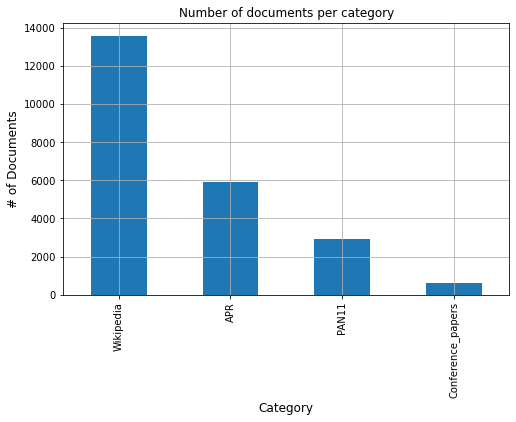

In [4]:
preprocces.plot_categories(df)

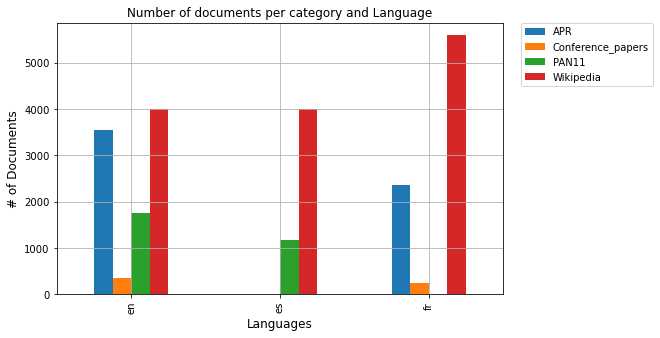

In [5]:
preprocces.plot_language_category(df)

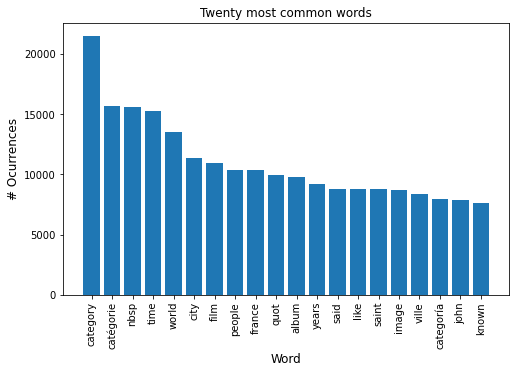

In [6]:
preprocces.plot_common_words(stats_words['count_words'])

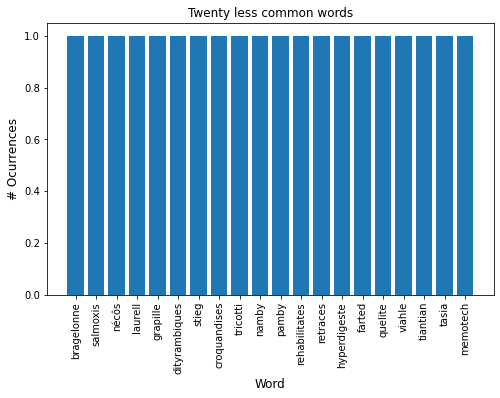

In [7]:
preprocces.plot_less_common_words(stats_words['count_words'])

**Loading class to help the comparations of models**

In [9]:
preprocces_model = PreproccesModel(df,stats_words)


Loading Labelencoder

In [10]:
lb = preprocces_model.label_encoder()

Loading tfidf model

In [11]:
tfidf = preprocces_model.tfidf_vector()

[2020-08-02][15:31:21][create_model][INFO] Number of words to train the model:1812


Import data to test the models

In [12]:
X_test, Y_test = preprocces_model.test_data()

[2020-08-02][15:31:31][create_model][INFO] Shape of test set (4605,)


Transform test data into tfidf matrix

In [13]:
tfidf_test = tfidf.transform(X_test)

Loading LSTM model

In [19]:
lstm = preprocces_model.load_lstm()

[2020-08-02][15:31:52][tensorflow][WARNING] From C:\Users\LW946LH\AppData\Local\Continuum\anaconda3\envs\pruebaea\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
[2020-08-02][15:31:56][tensorflow][WARNING] From C:\Users\LW946LH\AppData\Local\Continuum\anaconda3\envs\pruebaea\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



In [20]:
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 200)         1610400   
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 200)         240800    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100)               100400    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                

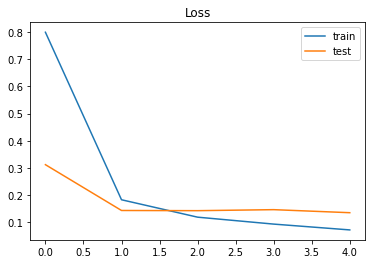

In [21]:
preprocces_model.plot_loss()

Transform data to test the LSTM model

In [22]:
tfidf_test = tfidf.transform(X_test)
lstm = preprocces_model.load_lstm()

Check model's performance

In [23]:
x_lstm,y_lstm =preprocces_model.data_to_lstm(tfidf_test,Y_test)

[2020-08-02][15:33:07][create_model][INFO] Shape of label tensor: (4605, 4)
[2020-08-02][15:33:07][create_model][INFO] Shape of X_test :(4605, 1, 1812)


In [24]:
predict_lstm = lstm.predict(x_lstm)

In [25]:
print(confusion_matrix(np.argmax(y_lstm, axis=1), np.argmax(predict_lstm, axis=1)))
print()
print(classification_report(np.argmax(y_lstm, axis=1), np.argmax(predict_lstm, axis=1)))

[[1116    5   30   31]
 [  14   91    2   15]
 [  28    1  536   18]
 [  20    6    9 2683]]

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1182
           1       0.88      0.75      0.81       122
           2       0.93      0.92      0.92       583
           3       0.98      0.99      0.98      2718

    accuracy                           0.96      4605
   macro avg       0.93      0.90      0.92      4605
weighted avg       0.96      0.96      0.96      4605



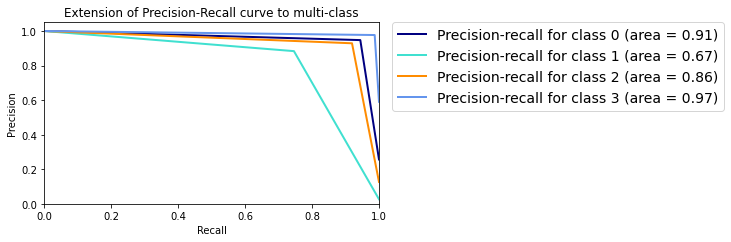

In [26]:
preprocces_model.plot_precision_recall_curve(np.argmax(predict_lstm, axis=1),np.argmax(y_lstm, axis=1))

Loading MLP model

In [27]:
mlp = preprocces_model.load_mlp()

In [28]:
mlp.get_params()

{'estimator__activation': 'relu',
 'estimator__alpha': 0.001,
 'estimator__batch_size': 'auto',
 'estimator__beta_1': 0.9,
 'estimator__beta_2': 0.999,
 'estimator__early_stopping': False,
 'estimator__epsilon': 1e-08,
 'estimator__hidden_layer_sizes': (50, 50, 50),
 'estimator__learning_rate': 'constant',
 'estimator__learning_rate_init': 0.001,
 'estimator__max_fun': 15000,
 'estimator__max_iter': 300,
 'estimator__momentum': 0.9,
 'estimator__n_iter_no_change': 10,
 'estimator__nesterovs_momentum': True,
 'estimator__power_t': 0.5,
 'estimator__random_state': None,
 'estimator__shuffle': True,
 'estimator__solver': 'adam',
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': True,
 'estimator__warm_start': False,
 'estimator': MLPClassifier(alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=300,
               verbose=True),
 'n_jobs': None}

In [29]:
predict_mlp = mlp.predict(tfidf_test)

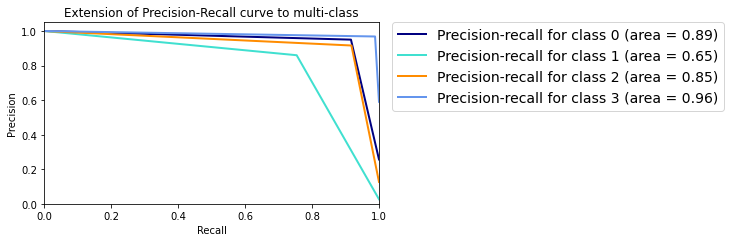

In [30]:
preprocces_model.plot_precision_recall_curve(predict_mlp,Y_test)

In [31]:
print(confusion_matrix(Y_test, predict_mlp))
print()
print(classification_report(Y_test, predict_mlp))

[[1083    9   39   51]
 [  16   92    2   12]
 [  22    1  535   25]
 [  19    5    8 2686]]

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1182
           1       0.86      0.75      0.80       122
           2       0.92      0.92      0.92       583
           3       0.97      0.99      0.98      2718

    accuracy                           0.95      4605
   macro avg       0.92      0.89      0.91      4605
weighted avg       0.95      0.95      0.95      4605



**All these process help to figure out the best model to classify text. The model chosen is LSTM**